# Mini Project AIML - Linear Regression

In [1]:
# The given problem of predicting cost of the bags should be placed in the category of 
# Regression problem as we have to find the process of finding a model or function
# for distinguishing the data into continuous real values instead of using classes or 
# discrete values.We have to identify the distribution movement depending on the given 
# data(historical). 

# Because a regression predictive model predicts a quantity, the skill of the model must 
# be reported as an error in those predictions. Regression is one of the most popular 
# supervised learning algorithms in predictive data analysis.

### Part 1 - Exploratory Data Analysis

In [2]:
# EDA, Exploratory Data Analysis is the process of performing 
# Descriptive Analytics or Data Exploration to perform descriptive analytics 
# before moving to building a predictive analytics model. 
# Descriptive statistics will help us to understand the variability in the 
# model and visualization of the data.

#### Data Analysis for the given Linear Regression problem 

In [3]:
## importing required library to read data from csv file
import pandas as pd
lugg_df = pd.read_csv('Data_miniproject.csv')

In [4]:
# get a peak of the dataset
lugg_df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
## Observations:
## With a quick look we can observer the following:
## 1. There is one dependent variable(Y) or Response which is column 'Cost' 
## 2. There are 5 independent variables or features as Height', Width', 'Length', 'Weight', 'Weight1'
## 3. The given Regression problem is Multi-Variate Regression. 
## 4. The Linear Regression equation is of form: Y = α + β1X1 + β2X2 + β3X3
## The selection of features plays the most important role in multivariate regression

In [6]:
# to get the shape of our data
lugg_df.shape

(159, 6)

In [7]:
## Observation:
## We know that the total rows#(observations) is 159 and column#(characteristics) is 6
## out of 6 characteristics:
##    'Cost' column is dependent variable, which is to be predicted
##     5 columns are features(independent) ('Height', 'Weight', 'Weight1', 'Length', 'Width')

In [8]:
# let's get some information about our data 
lugg_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [9]:
## Observation:
## By looking at the information above, we can see
# 1. data has only float values, so we need not to standardize the unit
# 2. no variable column has null values, so we are good in terms of junk data

In [10]:
# let's describe the data
# The describe() function in pandas is very handy in getting various summary statistics.
lugg_df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
## Observation:
## By looking at the above result, we can see some statistics summary
## we can see count, mean, standard deviation, minimum and maximum values and the quantiles of the data
## we can derive some observations:
##   1. the min and max of the the characteristics
##   2. mean value is slightly greater than median value of each column 
##      which is represented by 50% (50th percentile) in index column.
##   3. There is notably a large difference between 75th %tile and 
##        max values of predictors “Weight”, ”Weight1”,”Length”
##   4. The above observations suggests that there are outliers

In [12]:
# find the unique "Cost" values
lugg_df.Cost.unique()

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4,   19.7,   19.9])

In [13]:
## Observation:
## by above data we can infer that:
## The target/dependent variable is continuous in nature
## Cost value ranges from 0 to 1650

In [14]:
# to get the count of value of "Cost" group by different "Count"
lugg_df.Cost.value_counts()

300.0     6
500.0     5
120.0     5
700.0     5
1000.0    5
         ..
556.0     1
840.0     1
690.0     1
345.0     1
242.0     1
Name: Cost, Length: 101, dtype: int64

In [15]:
## This shows the number of unique values for each coulmn
## we see that we have almost discrete values for all the features

lugg_df.nunique()

Cost       101
Weight     116
Weight1     93
Length     124
Height     154
Width      152
dtype: int64

In [16]:
# check null or missing value

lugg_df.isnull().values.any()

False

#### Data cleanup and Transformation 

In [17]:
## Let's clean some data now
## From the prelim data analysis (in info, description) we can see that
## the columns "Weight" and "Weight1" are having almost same values,
## also both the fields provides weight, so we can take the avg of these columns,
## and use the Avg Weight as the new feature

lugg_df['Weight'] = (lugg_df['Weight'] + lugg_df['Weight1'])/2
lugg_df.head()

## To remove the stale records which contains zeros, we can replace zero with the mean of that attribute
lugg_df.replace(0,lugg_df.mean(axis=0),inplace=True)

In [18]:
## in th above result we can see that Avg weight is really close to Weight1 and Weight
## Now we can remove "Weight" and "Weight1" and use "Avg Weight" for Weight feature

lugg_df = pd.DataFrame(lugg_df, columns=['Cost', 'Weight', 'Length', 'Height', 'Width'])
lugg_df.head()

,Cost,Weight,Length,Height,Width
0,242.0,24.30,30.0,11.5200,4.0200
1,290.0,25.15,31.2,12.4800,4.3056
2,340.0,25.20,31.1,12.3778,4.6961
3,363.0,27.65,33.5,12.7300,4.4555
4,430.0,27.75,34.0,12.4440,5.1340


In [19]:
## We can also see that 'Length', 'Widht' and 'Height' are three relative dimensions using which,
## we can calculate "Volume"
## after calculatin "Volume", we can drop the featues 'Length', 'Widht' and 'Height'

lugg_df['Volume'] = lugg_df['Length'] * lugg_df['Height'] * lugg_df['Width']
lugg_df = pd.DataFrame(lugg_df, columns=['Cost', 'Weight', 'Volume'])

In [20]:
## Now we have 2 Features, and 1 Target
## Features: "Area", "Avg Weight"
## Target: "Cost"

lugg_df.head()

,Cost,Weight,Volume
0,242.0,24.30,1389.312000
1,290.0,25.15,1676.497306
2,340.0,25.20,1807.761723
3,363.0,27.65,1900.070253
4,430.0,27.75,2172.174864


#### Linear Regression Equation: Y = α + β1X1 + β2X2 + β3X3 

#### Standardization 

In [21]:
## Standardization of the data
## as now we have cleaned some data and have relevant attributes, we can do some standardization
## this refinement wil bring our dataset to a common standard in terms of scale, quantity etc 
## this process is helpful to make the regression modelling work faster and accurately

from sklearn import preprocessing

# Get column names first
names = lugg_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
lugg_df = scaler.fit_transform(lugg_df)
lugg_df = pd.DataFrame(lugg_df, columns=names)
lugg_df.head()

,Cost,Weight,Volume
0,-0.446858,-0.293673,-0.207097
1,-0.311814,-0.211329,-0.018413
2,-0.171144,-0.206485,0.067829
3,-0.106436,0.030860,0.128477
4,0.082063,0.040548,0.307253


In [22]:
lugg_df.describe()

,Cost,Weight,Volume
count,1.590000e+02,1.590000e+02,1.590000e+02
mean,1.284786e-16,3.910219e-17,-4.468822e-17
std,1.003160e+00,1.003160e+00,1.003160e+00
min,-1.111103e+00,-1.877588e+00,-1.106966e+00
25%,-7.830598e-01,-7.102379e-01,-7.971379e-01
50%,-3.118143e-01,-1.047657e-01,-4.486735e-01
75%,7.010118e-01,6.557074e-01,7.819387e-01
max,3.514418e+00,3.281035e+00,2.671987e+00


In [23]:
## Observation:
    # After standardization we can see that al the fields have come to a standard scale which is good for our model

#### Outliers 

In [24]:
## Outlier Detection Analysis
## An outlier is a data point in a data set that is distant from all other observations. 
## A data point that lies outside the overall distribution of the dataset.
## An outlier could exist in a dataset due to
##     1. Variability in the data
##     2. An experimental measurement error

#### Finding outliers - Using Z-score 

In [25]:
# Z - Score
# Formula for Z score = (Observation — Mean)/Standard Deviation
#    z = (X — μ) / σ

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(lugg_df))
print("Z-Score =>", z)

Z-Score => [[0.44685781 0.29367306 0.20709706]
 [0.31181432 0.21132884 0.01841304]
 [0.17114402 0.20648507 0.06782917]
 [0.10643568 0.03086004 0.12847693]
 [0.08206251 0.0405476  0.30725276]
 [0.13833063 0.08898538 0.40815269]
 [0.27900093 0.08898538 0.57664652]
 [0.03047372 0.14226693 0.24654861]
 [0.13833063 0.14226693 0.44450345]
 [0.27900093 0.21976737 0.55818552]
 [0.20866578 0.22945493 0.61157503]
 [0.27900093 0.24398626 0.52577157]
 [0.27900093 0.28758026 0.31741796]
 [0.17114402 0.33117426 0.60971493]
 [0.56034153 0.32633048 0.77002543]
 [0.56034153 0.32633048 0.98554042]
 [0.84168213 0.42320604 0.85653273]
 [0.84168213 0.42320604 0.8440146 ]
 [0.58847559 0.47164382 0.91547026]
 [0.70101183 0.47648759 0.98795626]
 [0.49000638 0.51523782 1.06677321]
 [0.79948104 0.52008159 1.09224516]
 [0.61660965 0.54914426 1.0179374 ]
 [0.78541401 0.58789448 1.40971535]
 [0.84168213 0.59273826 1.29535543]
 [0.91201727 0.58789448 1.54122955]
 [0.89795024 0.59758204 1.53806217]
 [0.88106981 0.67

In [26]:
## Observation:
     ## The above shape changes by -3 shape, so it means we have 3 outliers

#### Finding outliers - Using IQR 

In [27]:
# IQR - Interquartile range
# Formula for IQR :
    # IQR = Q3 - Q1
# The interquartile range (IQR) is a measure of statistical dispersion, 
# being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles.

Q1 = lugg_df.quantile(0.25)
Q3 = lugg_df.quantile(0.75)
IQR = Q3 - Q1

print("IQR:")
print(IQR)

lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 

print()
print("Lower bound:")
print(lower_bound)
print()
print("Upper bound:")
print(upper_bound)

IQR:
Cost      1.484072
Weight    1.365945
Volume    1.579077
dtype: float64

Lower bound:
Cost     -3.009167
Weight   -2.759156
Volume   -3.165753
dtype: float64

Upper bound:
Cost      2.927119
Weight    2.704625
Volume    3.150554
dtype: float64


In [28]:
## Observation - IQR:
    ## lower_bound is -2 and upper bound is 3, so anything outside of (-2, 3) is an outlier.

In [29]:
## removing Outliers using IQR
def remove_outlier(df, low, high):
    #low = .05
    #high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
#         if is_numeric_dtype(lugg_df[name]):
        df = df[(df[name] > quant_df.loc[low, name]) 
        & (df[name] < quant_df.loc[high, name])]
    return df

In [30]:
# After removing outliers using Z-Score calculated above
lugg_df = lugg_df[(z < 3).all(axis=1)]
lugg_df.shape

(156, 3)

#### Correlation using Heat Map 

In [31]:
# The maximum value r = 1 corresponds to the case when there’s a perfect positive linear 
# relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.

# The value r > 0 indicates positive correlation between x and y
# The value r = 0 corresponds to the case when x and y are independent
# The value r < 0 indicates negative correlation between x and y
# The minimal value r = −1 corresponds to the case when there’s a perfect negative 
#    linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

Correlation Matrix:
Correlation of Cost with Weight: 0.8960309891943178
Correlation of Cost with Volume: 0.9550135685488005


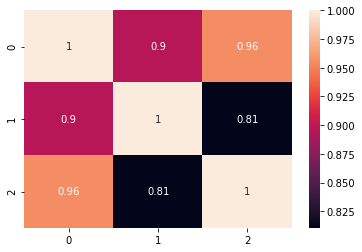

In [32]:
## Finding Correlation and depicting using Heat Map

import seaborn as sb

correlation_matrix = np.corrcoef(lugg_df.T)
print("Correlation Matrix:")
print("Correlation of Cost with Weight:", correlation_matrix[0,1])
print("Correlation of Cost with Volume:", correlation_matrix[0,2])
sb.heatmap(data=correlation_matrix, annot=True)

In [33]:
## Observation - Correlation
    # we can see that the correlation of the "Cost" with "Weight" and "Volume" is ~1, so it's nearly perfect correlation 

### Part 2 - Plotting of various graphs & correlations

#### Scatter Plot 

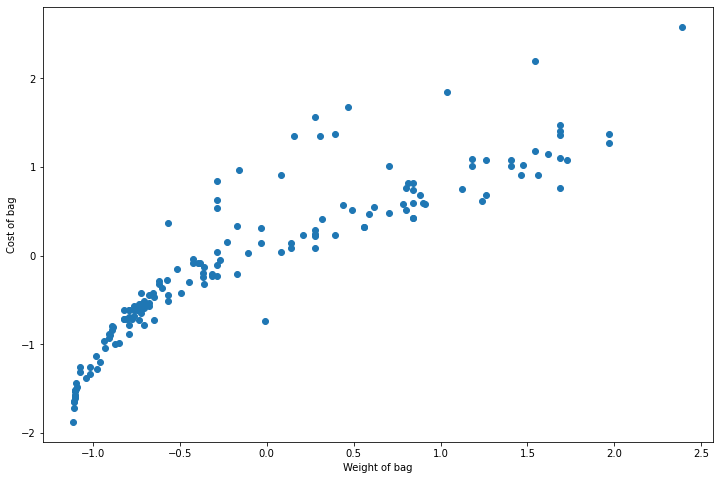

In [34]:
    # Finding Correlation between Cost and Weight
    import matplotlib.pyplot as plt

    fig, ax  = plt.subplots(figsize=(12, 8))
    ax.scatter(lugg_df['Cost'], lugg_df['Weight'])
    ax.set_xlabel('Weight of bag')
    ax.set_ylabel('Cost of bag')
    plt.show()

In [35]:
## Observation - Scatterplot b/w Cost and Weight
    # we can see that both the varibales "Cost" and "weight" have a positive correlation
    # there is straight line of regression with 3 point as outliers which are outside the line

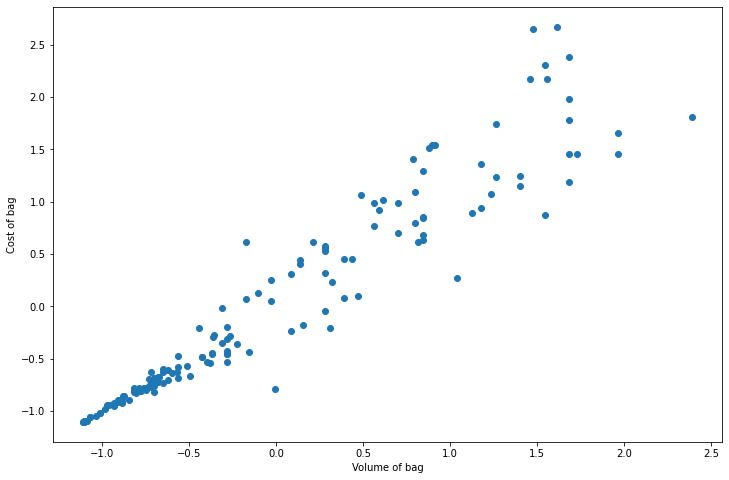

In [36]:
# Finding Correlation between Cost and Volume
import matplotlib.pyplot as plt

fig, ax  = plt.subplots(figsize=(12, 8))
ax.scatter(lugg_df['Cost'], lugg_df['Volume'])
ax.set_xlabel('Volume of bag')
ax.set_ylabel('Cost of bag')
plt.show()

In [37]:
## Observation - Scatterplot b/w Cost and Volume
    # we can see that both the varibales "Cost" and "Volume" have a positive correlation
    # there is straight line of regression with 3 point as outliers which are outside the line

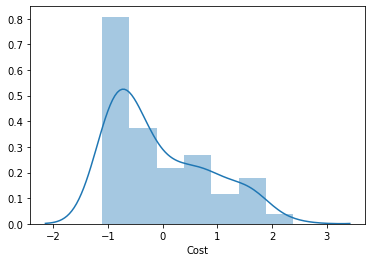

In [38]:
## Distribution Plot for Cost (the dependent variable)
sb.distplot(lugg_df['Cost'])

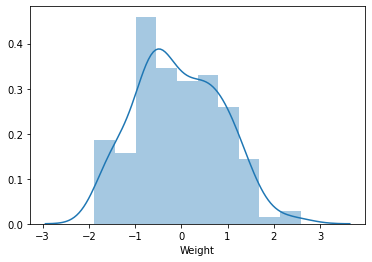

In [39]:
## Distribution Plot for Weight
sb.distplot(lugg_df['Weight'])

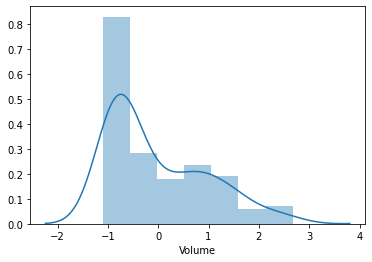

In [40]:
## Distribution plot for Volume
sb.distplot(lugg_df['Volume'])

#### Categorical plot 

In [41]:
# Categorical plotting represents the categorical data with a scatter plot, 
# All of the points belonging to one category would fall on the same position 
#     along the axis corresponding to the categorical variable. 

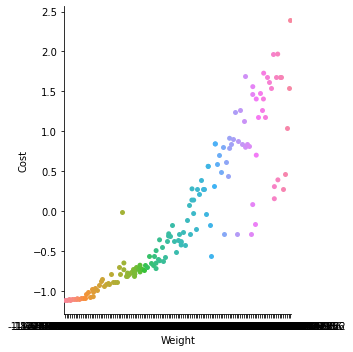

In [42]:
## Categorical plot for Cost vs Weight
sb.catplot(x="Weight", y="Cost", data=lugg_df);

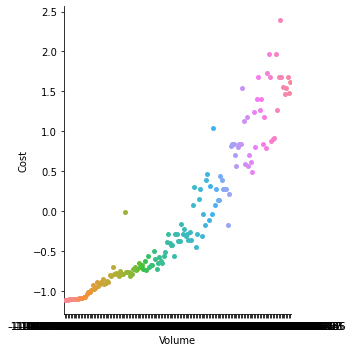

In [43]:
## Categorical plot for Cost vs Volume
sb.catplot(x="Volume", y="Cost", data=lugg_df);

#### Box Plot 

In [44]:
# Box Plot is the visual representation of the depicting groups of numerical data through their quartiles
# Boxplot is also used for detect the outlier in data set
# It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups
# Boxplot summarizes a sample data using 25th, 50th and 75th percentiles
# These percentiles are also known as the lower quartile, median and upper quartile

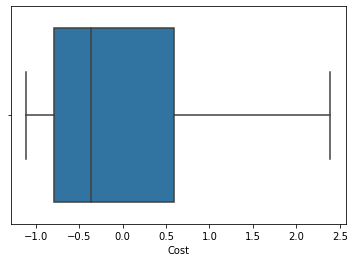

In [45]:
## box plot for Cost
import seaborn as sb
sb.boxplot(x=lugg_df['Cost'])

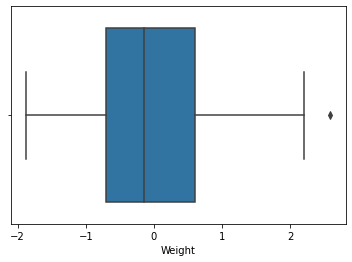

In [46]:
## box plot for Weight
sb.boxplot(x=lugg_df['Weight'])

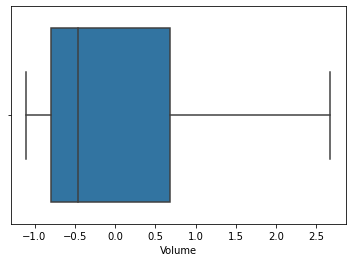

In [47]:
## box plot for Volume
sb.boxplot(x=lugg_df['Volume'])

#### Line Plot

In [48]:
# The lineplot (lmplot) is one of the most basic plots. 
# It shows a line on a 2 dimensional plane. 
# We can plot it with seaborn or matlotlib depending on your preference.
# it shows the behaviour of Target variable w.r.t the change in the feature

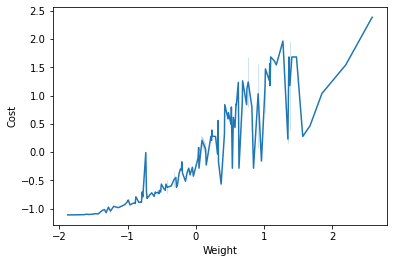

In [49]:
## Line plot for Cost vs Weight
sb.lineplot(x='Weight',y='Cost',data=lugg_df)

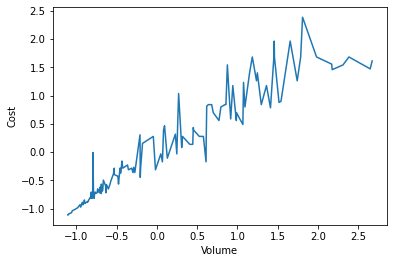

In [50]:
## Line plot for Cost vs Volume
sb.lineplot(x='Volume',y='Cost',data=lugg_df)

#### Histogram plot 

In [51]:
## A histogram is a plot of the frequency distribution of numeric array by splitting it to small equal-sized bins.

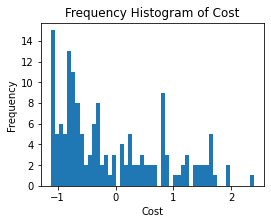

In [52]:
## Histogram for Cost
plt.figure(figsize=(4, 3))
plt.hist(lugg_df['Cost'], bins=50)
plt.gca().set(title='Frequency Histogram of Cost',xlabel='Cost', ylabel='Frequency');
plt.show()

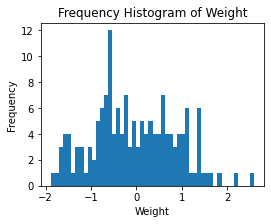

In [53]:
## Histogram for Weight
plt.figure(figsize=(4, 3))
plt.hist(lugg_df['Weight'], bins=50)
plt.gca().set(title='Frequency Histogram of Weight', xlabel='Weight', ylabel='Frequency');
plt.show()

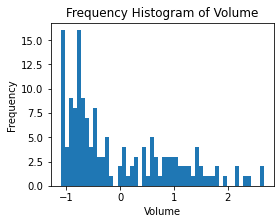

In [54]:
## Histogram for Volume
plt.figure(figsize=(4, 3))
plt.hist(lugg_df['Volume'], bins=50)
plt.gca().set(title='Frequency Histogram of Volume', xlabel='Volume', ylabel='Frequency');
plt.show()

#### Linear Regression Using sklearn

In [55]:
import sklearn
from sklearn import linear_model

X = lugg_df[['Volume', 'Weight']]
Y = lugg_df['Cost']

## running LR model with sklearn
reg = linear_model.LinearRegression()
reg.fit(X,Y)

## intercept and coefficients
print('Intercept =>', reg.intercept_)
print('Coeficient =>', reg.coef_)

Intercept => -0.023993763880718326
Coeficient => [0.60894546 0.34731377]


In [56]:
## Observation:
    # the Intercept(m) is -0.023993763880718326
    # the coefficients (w1, w2) are (0.60894546 , 0.34731377)

In [57]:
# Training and testing datasets splitting with cross_validation
# Training and testing splitting data with 75% and 25%
# randomserach cross_validation is used

import sklearn as skl
from sklearn import preprocessing

X = lugg_df[['Volume', 'Weight']]
Y = lugg_df['Cost']

min_max_scaler = preprocessing.MinMaxScaler()

X_df = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(X)))
Y_df=Y
#Y_df =  pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(Y)))

X_train, X_test, Y_train, Y_test = skl.model_selection.train_test_split(X_df,
                                                                             Y_df,
                                                                             test_size = 0.25,
                                                                             random_state = 5)
print("X_Train =", X_train.shape)
print("Y_Train =", Y_train.shape)

print("X_Test =", X_test.shape)
print("Y_Test =", Y_test.shape)
print(X_train)
print(Y_train)

X_Train = (117, 2)
Y_Train = (117,)
X_Test = (39, 2)
Y_Test = (39,)
            0         1
48   0.133229  0.326819
4    0.374236  0.429967
70   0.220262  0.348534
54   0.305656  0.491857
43   0.090164  0.287731
..        ...       ...
8    0.410555  0.452769
73   0.014606  0.111835
144  0.000583  0.052117
118  0.652783  0.648208
99   0.105865  0.348534

[117 rows x 2 columns]
48    -0.652236
4      0.082063
70    -0.359642
54    -0.030474
43    -0.705691
         ...   
8      0.138331
73    -1.037673
147   -1.108008
118    1.179291
99    -0.621289
Name: Cost, Length: 117, dtype: float64


In [58]:
## Observation:
    # we have splitted our data set in Training Data set and Test Data set in the ratio of 70-30

Coefficients => [2.28696736 1.5380761 ]
RMSE => 0.22297094239929793


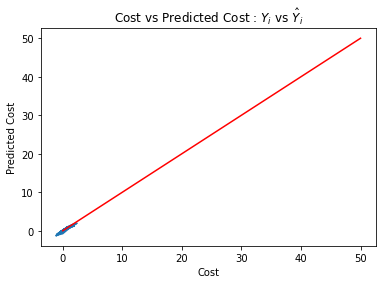

In [59]:
## Caclulating RMSE using sklearn LR model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

error=abs(Y_test-Y_pred)
total_error = np.dot(error, error)

print("Coefficients =>", lm.coef_)

# Compute RMSE
rmse_lr= np.sqrt(total_error/len(error))
print('RMSE =>',rmse_lr)

# plt.show()
plt.plot(Y_test, Y_pred)
plt.plot([0,50],[0,50], 'r-')
plt.title("Cost vs Predicted Cost : $Y_i$ vs $\hat{Y}_i$")
plt.xlabel('Cost')
plt.ylabel('Predicted Cost')
plt.show()

In [60]:
## Observation:
# In the result shown above, 

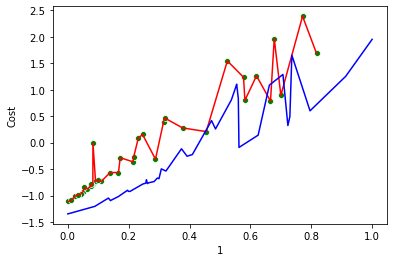

In [61]:
## Scatter plot to depict relation bewtween Test data and predicted Y
sb.scatterplot(X_test[0], Y_test , color='green')
sb.lineplot(X_test[0], Y_test , color='red')
sb.lineplot(X_test[1], Y_pred, color='blue')

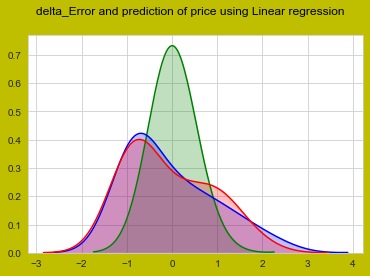

In [62]:
## Showing delta_Error and prediction of price using Linear regression
## depicting difference between Actual Y and Predicted Y

delta_y = Y_test - Y_pred

fig3 = plt.figure( facecolor='y', edgecolor='k')
fig3.suptitle('delta_Error and prediction of price using Linear regression', fontsize=12)
        
sb.set_style('whitegrid')

# show delta in Green color
sb.kdeplot(np.array(delta_y),shade=True, color="g", bw=0.5)

# show Actual Y in Blue color
sb.kdeplot(np.array(Y_test),shade=True, color="b", bw=0.5)

# show Predicted Y in Red color
sb.kdeplot(np.array(Y_pred),shade=True, color="r", bw=0.5)

In [63]:
## Observation:
    # In the above graph, we can see that there is very less difference between the actual Y vs predicted Y
    # the delta is shown at the middle where there is slight deviation 

### Part 3 - Model Building using Multiple Linear Regression 

#### 3.1 SGD  - Stochastic Gradient Descent

In [64]:
## creating a template to store the iteration results in SDG algo
models_performence1 = {
    'Model':[],
    'Batch_Size':[],
    'RMSE': [], 
    'MSE':[],
    'Iteration':[],
    'Optimal learning Rate':[],
    'Cost_History':[],
    
  
}

columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate", "Cost_History"]

pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate,Cost_History


In [65]:
## a utility method to return sqaure of a given number

def square(list):
        return [(i ** 2) for i in list]

In [66]:
## Implementing SGD function
## It takes the batch size and the number of iterations
## Few assumption while implementinf the SDG algo
# we will use - sklearn.linear_model.SGDRegressor
# alpha is as learning rate
# n_iter is as batch size

from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

#Here, alpha is as learning rate

def SGD_model(x, initial_batch_size):
    
    print("Running Stochastic Gradient Descent (SGD) model...")
    
    #initial_batch_size=100
    batch=[]
    
    ## Iterate for number of iterations
    for l in range(x):
        batch_size_value= initial_batch_size + initial_batch_size * l
        batch.append(batch_size_value)        
        z=0        
        scale_max=np.max(Y_test[0:batch_size_value])        
        Learning_rate=1 # initial learning rate=1
        score=[]
        LR=[] # storing value for learning rate
        Total_score=[]
        epoch1=[]
        global delta_error
        delta_error=[]
        Y_Test=[]
        global Y_hat_Predicted
        Y_hat_Predicted=[]
        test_cost=[]
        train_cost=[]
        n_iter=100
        
        ## iterate over each element for the batch size
        for k in range(1, batch_size_value+1):
            # Appending learning rate 
            LR.append(Learning_rate) 
            
            # SGDRegressor
            sgdreg = linear_model.SGDRegressor(penalty='none', 
                                               alpha=Learning_rate,
                                               n_iter_no_change=100)
            yii=Y_train[0:batch_size_value]
            xii=X_train[0:batch_size_value]
            xtt=X_test[0:batch_size_value]
            ytt=Y_test[0:batch_size_value]
            Y_Test.append(ytt)
            
            clf=sgdreg.fit(xii,yii)
            Traing_score=clf.score(xii,yii)
            train_cost.append(Traing_score)
            training_error=1-Traing_score
             
            # p predicting on x_test
            
            # Predicted value of y
            y_hat = sgdreg.predict(xtt)
                        
            clf1=sgdreg.fit(xtt,ytt)
            Testing_score=clf1.score(xtt,ytt)
            test_cost.append(Testing_score)
            Testing_error=1-Testing_score
            Y_hat_Predicted.append(y_hat)
            # error = Y_test - y_prediction
            err = abs(ytt - y_hat)
            delta_error.append(err)
            
            score.append(Testing_score)
            # print(rmse)
            
            # Iteration 
            iteration_no=sgdreg.n_iter_
            epoch1.append(iteration_no)
            #print('Epoch=',iteration_no)
            #print('Learning_rate',Learning_rate) 

            Learning_rate=Learning_rate/2
            z+=1
            
        print("\nTraining Error =>",training_error)  
        print("Testing_error =>",Testing_error)
       
        models_performence1['Cost_History'].append(train_cost)
        models_performence1['Model'].append('sklearn.linear_model.SGDRegressor')
        models_performence1['Iteration'].append(sum(epoch1)/len(epoch1))
        global best_Learning_rate
        best_Learning_rate=LR[score.index(min(score))]
        models_performence1['Optimal learning Rate'].append(best_Learning_rate)
        print('The best value of best_Learning_rate is: %d.' % (best_Learning_rate),7)
        MSEscore=scale_max*sum(score)/len(score)
        score_value=np.sqrt(MSEscore)
        print('Batch Size =>',batch[l])
        
        models_performence1['Batch_Size'].append(batch[l])
        print("RMSE with batch size",str(batch[l]),"is",score_value)
        models_performence1['RMSE'].append(score_value)
        print("MSE with batch size",str(batch[l]),"is",MSEscore)
        models_performence1['MSE'].append(MSEscore)

In [67]:
SGD_model(3,50)

Running Stochastic Gradient Descent (SGD) model...

Training Error => 0.1995539805864862
Testing_error => 0.17676528495596022
The best value of best_Learning_rate is: 0. 7
Batch Size => 50
RMSE with batch size 50 is 1.4029252535949133
MSE with batch size 50 is 1.9681992671743518

Training Error => 0.08638527110804717
Testing_error => 0.176450978069976
The best value of best_Learning_rate is: 0. 7
Batch Size => 100
RMSE with batch size 100 is 1.4028605657435849
MSE with batch size 100 is 1.968017766918411

Training Error => 0.06695098496931273
Testing_error => 0.17684662749033486
The best value of best_Learning_rate is: 0. 7
Batch Size => 150
RMSE with batch size 150 is 1.4028763047809472
MSE with batch size 150 is 1.9680619265158448


In [68]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,sklearn.linear_model.SGDRegressor,50,1.402925,1.968199,214.620000,9.536743e-07
1,sklearn.linear_model.SGDRegressor,100,1.402861,1.968018,214.520000,2.328306e-10
2,sklearn.linear_model.SGDRegressor,150,1.402876,1.968062,214.513333,1.577722e-30


In [69]:
## Observation:
# In sklearn SGDRegressor, It is observed that as batch size increases optimal learning rate decreses.
# RMSE value is around 1.4  
# MSE value is around 1.9
# RMSE value for batch size 100 is approximately same with other batch size.
# For Batch size=150, RMSE & learning Rate is lowest.

#### 3.3 - Regression Modeeling using MBGD - Mini Batch Gradient Descent 

In [70]:
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 

In [71]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [72]:
# function to compute gradient of error function w.r.t. theta 
def calc_gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    loss = h - y
    grad = np.dot(X.transpose(), loss) 
    return grad

In [73]:
def create_minibatches(inputs, targets, batchsize, shuffle=False):
    print("\t\tCreating mini batches with following params:")
    print("\t\tInput size:", inputs.shape[0])
    print("\t\tTarget size:", targets.shape[0])
    print("\t\tBatch Size: ", batchsize)
    
    assert inputs.shape[0] == targets.shape[0]

    for start_idx in range(0, inputs.shape[0], batchsize):
        end_idx = min(start_idx + batchsize, inputs.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield inputs[excerpt], targets[excerpt]

In [74]:
def mini_batch_gradient_descent(X, Y, alpha, iterations, batch_size):
    
    print("Calculating Mini-Gradient Descent...Start")
    
    cost_history = [0] * (iterations)
    m = len(Y)    
    
    for iteration in range(iterations):    
        print("\tIteration of Mini-Gradient Descent...")
        
        mini_batches = create_minibatches(X, Y, batch_size)        
        
        for mini_batch in mini_batches:             
            
            X_minB, Y_minB = mini_batch            
            theta = np.zeros((X_minB.T.shape[0], 1)) 
            
            # Gradient Calculation            
            gradient = calc_gradient(X_minB, Y_minB, theta)
            
            # Changing Values of theta using Gradient
            theta = theta - alpha * gradient
            
            # New Cost Value
            cost = cost_function(X_minB, Y_minB, theta)
            
        cost_history.append(cost)
            
    print("Calculating Mini-Gradient Descent...Finished")    
    return theta, cost_history

In [75]:
## Driver program to run the Mini-Batch Gradient Descent Algorithm

m = len(X_train[0])  # number of features
x0 = np.ones(m)      # a scalar vector of 1's

# preparing features and traget
X = np.array([x0, X_train[0].values, X_train[1].values]).T
Y = np.array(Y_train.values)

## Calculating Intial Cost before Applying Mini-Batch Gradient Descent
theta = np.zeros((3, 1)) 
inital_cost = cost_function(X, Y, theta)
print("Intial Cost before Applying Mini-Batch Gradient Descent:", inital_cost)

alpha = 0.001   #learning rate (alpha)
iterations = 3
batch_size = 10

theta, error_list = mini_batch_gradient_descent(X, Y, alpha, iterations, batch_size)

print("\n\tBias =>", theta) 
print("\n\tCoefficients =>", error_list[-1]) 


Intial Cost before Applying Mini-Batch Gradient Descent: 44.731778246634896
Calculating Mini-Gradient Descent...Start
	Iteration of Mini-Gradient Descent...
		Creating mini batches with following params:
		Input size: 117
		Target size: 117
		Batch Size:  10
	Iteration of Mini-Gradient Descent...
		Creating mini batches with following params:
		Input size: 117
		Target size: 117
		Batch Size:  10
	Iteration of Mini-Gradient Descent...
		Creating mini batches with following params:
		Input size: 117
		Target size: 117
		Batch Size:  10
Calculating Mini-Gradient Descent...Finished

	Bias => [[-2.13316066e-04  5.59636725e-03  9.68314440e-04 -7.26371142e-03
  -7.75605746e-03  8.25503589e-03 -4.34902284e-03]
 [-6.23359513e-05  1.63538960e-03  2.82964161e-04 -2.12262662e-03
  -2.26650167e-03  2.41231486e-03 -1.27088635e-03]
 [-8.10316497e-05  2.12587303e-03  3.67830318e-04 -2.75924139e-03
  -2.94626721e-03  3.13581245e-03 -1.65204854e-03]]

	Coefficients => 2.329577589255856


In [76]:
# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [77]:
from sklearn.metrics import mean_squared_error

print("Evaulation of Mini-Batch Gradient Descent model:")

# calculating Y_pred by taking dot product of X and Theta

X = np.array([x0, X_train[0].values, X_train[1].values]).T
# Y_pred=np.dot(X, theta)

theta_min = [] 
  
# using np.mean() 
for i in range(len(theta)): 
    theta_min.append(np.min(theta[i])) 

Y_pred=np.dot(X, theta_min)

# Mean Squared Error
mse = mean_squared_error(Y, Y_pred)
print("\t MSE =>", mse)

# calculating RMSE (Root Mean Square Error)
rmse = np.sqrt(mse)
print("\t RMSE =>", rmse)

# calculating R^2 
mean_y = np.mean(Y)
ybar = np.sum(Y)/len(Y)
ss_tot = np.sum((Y - ybar)**2)
ss_res = mse
r2_score = 1 - (ss_res / ss_tot)
print("\t R^2 =>", r2_score)

Evaulation of Mini-Batch Gradient Descent model:
	 MSE => 0.7652041600433653
	 RMSE => 0.8747594869696271
	 R^2 => 0.9913863919804308


In [78]:
## Observation:
    # We have very low value of RMSE score and a good R^2R score. I guess our model was pretty good.
    # MSE => 0.7652041600433653
    # RMSE => 0.8747594869696271
    # R^2 => 0.9913863919804308

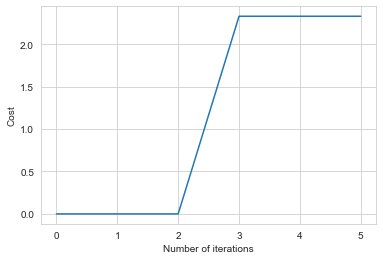

In [79]:
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

#### 3.3 - Implementing Regression using Normal SK-Learn library

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model Intialization
linearRegModel = LinearRegression()

# Data Fitting
# After defining the model, our next step is to train it. 
# We re going to use the "linear_regression.fit" method provided by sklearn to train the model.
# Note that we’re passing variables X_train and Y_train, created in an earlier step, to the fit method.

linReg = linearRegModel.fit(X_train, Y_train)

# Y Prediction
# we’ll be using the model to predict the target values for given features. 
# the input to the predict function will be the feature variable x  
# the output will be a variable y_pred that will contain all the predictions generated by the model.

Y_pred = linReg.predict(X_train)

# Model Evaluation
mse = mean_squared_error(Y_train, Y_pred)
rmse = np.sqrt(mse)
r2 = linReg.score(X_train, Y_train)

coeffs = linReg.coef_
intercept = linReg.intercept_

print("Evaluation of Normal SK-Learn library:")
print("\t Intercept(m)=>", intercept)
print("\t Coefficients(Wn) =>", coeffs)

print("\t MSE =>", mse)
print("\t RMSE =>", rmse)
print("\t R^2 =>", r2)

Evaluation of Normal SK-Learn library:
	 Intercept(m)=> -1.3494301715153054
	 Coefficients(Wn) => [2.28696736 1.5380761 ]
	 MSE => 0.03091267585764252
	 RMSE => 0.17582000983290416
	 R^2 => 0.9592872682486968


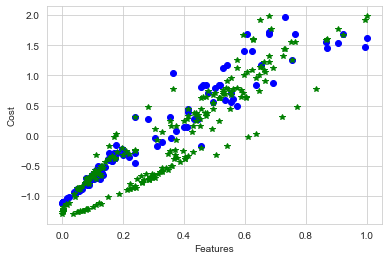

In [81]:
## Plotting the Linear Regression Model
plt.scatter(X_train[0], Y_train, color ='b') 
plt.plot(X_train, Y_pred,'g*')
plt.xlabel('Features')
plt.ylabel('Cost')
plt.show()

### Part 4 - Calculating the R squared, RMSE and MSE for the model  

In [82]:
## Trying to evaluate without any modelling, just by using the raw formulas 

import sklearn.metrics as metrics

# calculating mean absolute error
mae = metrics.mean_absolute_error(Y_train, Y_pred)

# calculating mean squared error
mse = metrics.mean_squared_error(Y_train, Y_pred)

# calculating root mean squared error
rmse = np.sqrt(mse) 

# calculating R^2 score
r2 = metrics.r2_score(Y_train, Y_pred)

print("Results of sklearn.metrics:")
print("\t MAE:",mae)
print("\t MSE:", mse)
print("\t RMSE:", rmse)
print("\t R-Squared(R^2):", r2)

Results of sklearn.metrics:
	 MAE: 0.12175296319586673
	 MSE: 0.03091267585764252
	 RMSE: 0.17582000983290416
	 R-Squared(R^2): 0.9592872682486968


In [83]:
## Finished